## Solid–Liquid Phase Transitions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina' 
# the lines below set a number of parameters for plotting, such as label font size, 
# title font size, which you may find useful
plt.rcParams.update({'font.size': 14,
                     'font.family':'sans-serif',
                     'axes.titlesize': 16,
                     'axes.labelsize': 18,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 18,
                     'ytick.labelsize' : 18,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 



When a liquid is cooled down and reaches the (freezing) melting temperature, the liquid may enter the solid phase. Directly at the melting temperature, the free energy of the solid and the liquid are the same (also the chemical potentials). When forming a crystal, the system needs to spend energy on creating the interface between liquid and solid, which requires a surface free energy to come from somewhere. The transition from the liquid to the solid, however, is not freeing any energy. As a result, the liquid cannot freeze directly at the freezing temperature. To freeze the liquid, undercooling is required. An undercooling by a temperature $ΔT$ would create a free energy difference $ΔG$ between liquid and solid.

![image-2.png](img/freezing.png)

_Free energy of solid and liquid phase of a material as a function of temperature_

### Kinetics of the Liquid–Solid Phase Transition

To start the phase transition from a liquid to a solid in the undercooled liquid, a nucleus of a certain size has to appear from thermal fluctuations. This goes along the lines we discussed for the liquid-liquid phase transitions. To create a nucleus of a radius $r$ we need a free energy change

$$
\Delta G = \frac{4}{3} \pi r^3 \Delta G_{\mathrm{b}} + 4 \pi r^2 \gamma_{\mathrm{sl}},
$$

where $\Delta G_{\mathrm{b}}$ is the free energy change per unit volume when creating the volume phase of the solid material. $\gamma_{\mathrm{sl}}$ denotes the interfacial free energy for the solid/liquid contact. We also know that at a first-order phase transition all energy inserted into the system (the latent heat $\Delta H_{\mathrm{m}}$ at the melting temperature $T_{\mathrm{m}}$) is going into a change in the entropy of the system, i.e.,

$$
\Delta S_{\mathrm{m}} = \left( \frac{\partial G_{\mathrm{s}}}{\partial T} \right)_{p} - \left( \frac{\partial G_{\mathrm{l}}}{\partial T} \right)_{p} = \frac{\Delta H_{\mathrm{m}}}{T_{\mathrm{m}}}.
$$

We can, therefore, extrapolate the free energy change at the undercooled temperature by

$$
\Delta G_{\mathrm{b}} = -\frac{\Delta H_{\mathrm{m}}}{T_{\mathrm{m}}} \Delta T
$$

which yields

$$
\Delta G = -\frac{4}{3} \pi r^3 \frac{\Delta H_{\mathrm{m}}}{T_{\mathrm{m}}} \Delta T + 4 \pi r^2 \gamma_{\mathrm{sl}}.
$$

According to our nucleation theory, this yields a critical radius of the nucleus of

$$
r^{*} = \frac{2 \gamma_{\mathrm{sl}} T_{\mathrm{m}}}{\Delta H_{\mathrm{m}} \Delta T}.
$$

A nucleus of size $r < r^*$ would thus have the tendency to dissolve again, while a nucleus of size $r > r^*$ is ready to grow continuously. The critical radius of the nucleus corresponds to a free energy barrier

$$
\Delta G^{*} = \frac{16 \pi}{3} \gamma_{\mathrm{sl}}^3 \left( \frac{T_{\mathrm{m}}}{\Delta H_{\mathrm{m}}} \right)^2 \frac{1}{\Delta T^2}.
$$

The probability of critical nucleus formation can thus be determined from the Boltzmann factor

$$
e^{-\frac{\Delta G^{*}}{k_{\mathrm{B}} T}}
$$

which is a very strong function of temperature. Inserting typical values, e.g., for water/ice, we find the following free energies as a function of the nucleus radius ($\Delta T = 10\, \mathrm{K}$).

In [2]:
def dG(r,dT):
    gamma_sl=38e-3 #(38mJ/m^2)
    Tm=273.15
    dHm=3.34e8 # (J/m^3)
    return(-4*np.pi*r**3*dHm*dT/Tm/3+4*np.pi*r**2*gamma_sl)

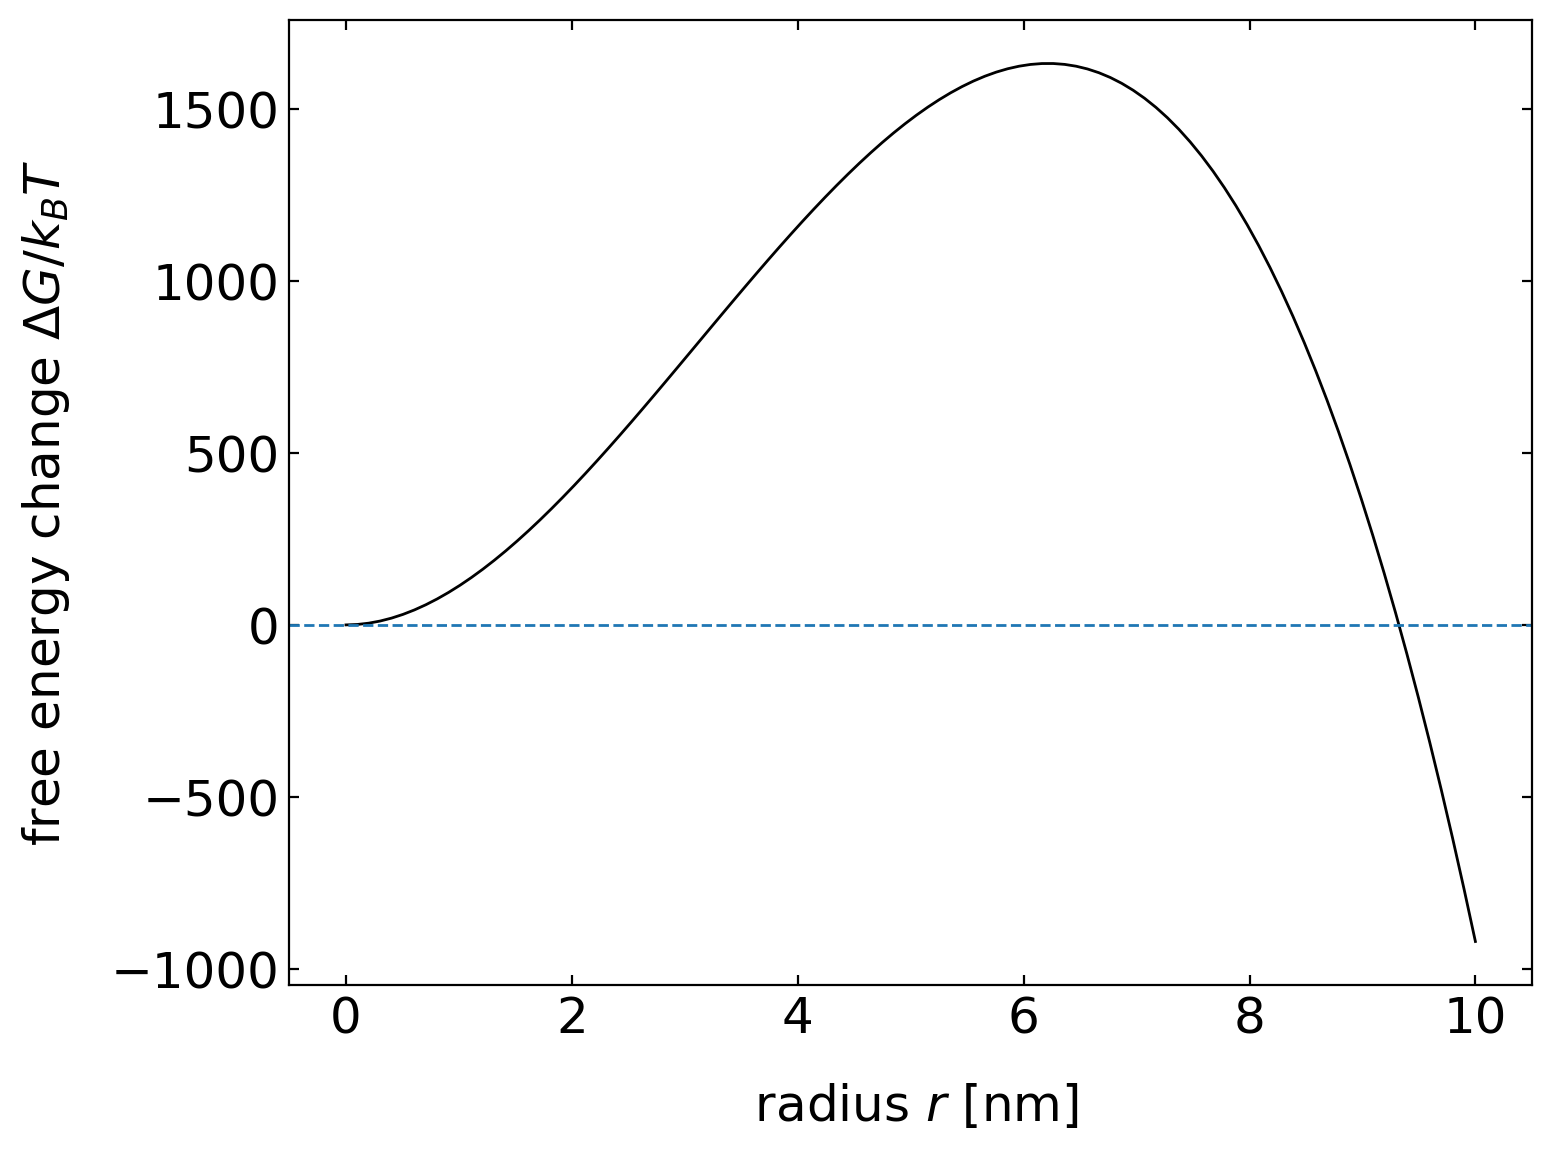

In [10]:
plt.figure(figsize=(8,6))
r=np.linspace(0,1e-8,100)
kbT=3.769e-21
plt.plot(r*1e9,dG(r,10)/kbT,'k-')
plt.xlabel(' radius $r$ [nm] ')
plt.ylabel('free energy change $\Delta G/k_{B}T$')
plt.axhline(y=0,ls='--')
plt.tight_layout()
plt.savefig("img/dG.png")
plt.show()

The free energy barrier is therefore about 1500 times bigger than the thermal energy. Homogeneous nucleation from the bulk liquid phase thus essentially never happens. Even at a strong undercooling of about 50 K as shown in the plot below, the free energy barrier is about 65 times bigger than the thermal energy.

In [4]:
def dGstar(dT):
    gamma_sl=38e-3 #(38mJ/m^2)
    Tm=273.15
    dHm=3.34e8 # (J/m^3)
    return(16*np.pi*gamma_sl**3*(Tm/dHm)**2/dT**2/3)

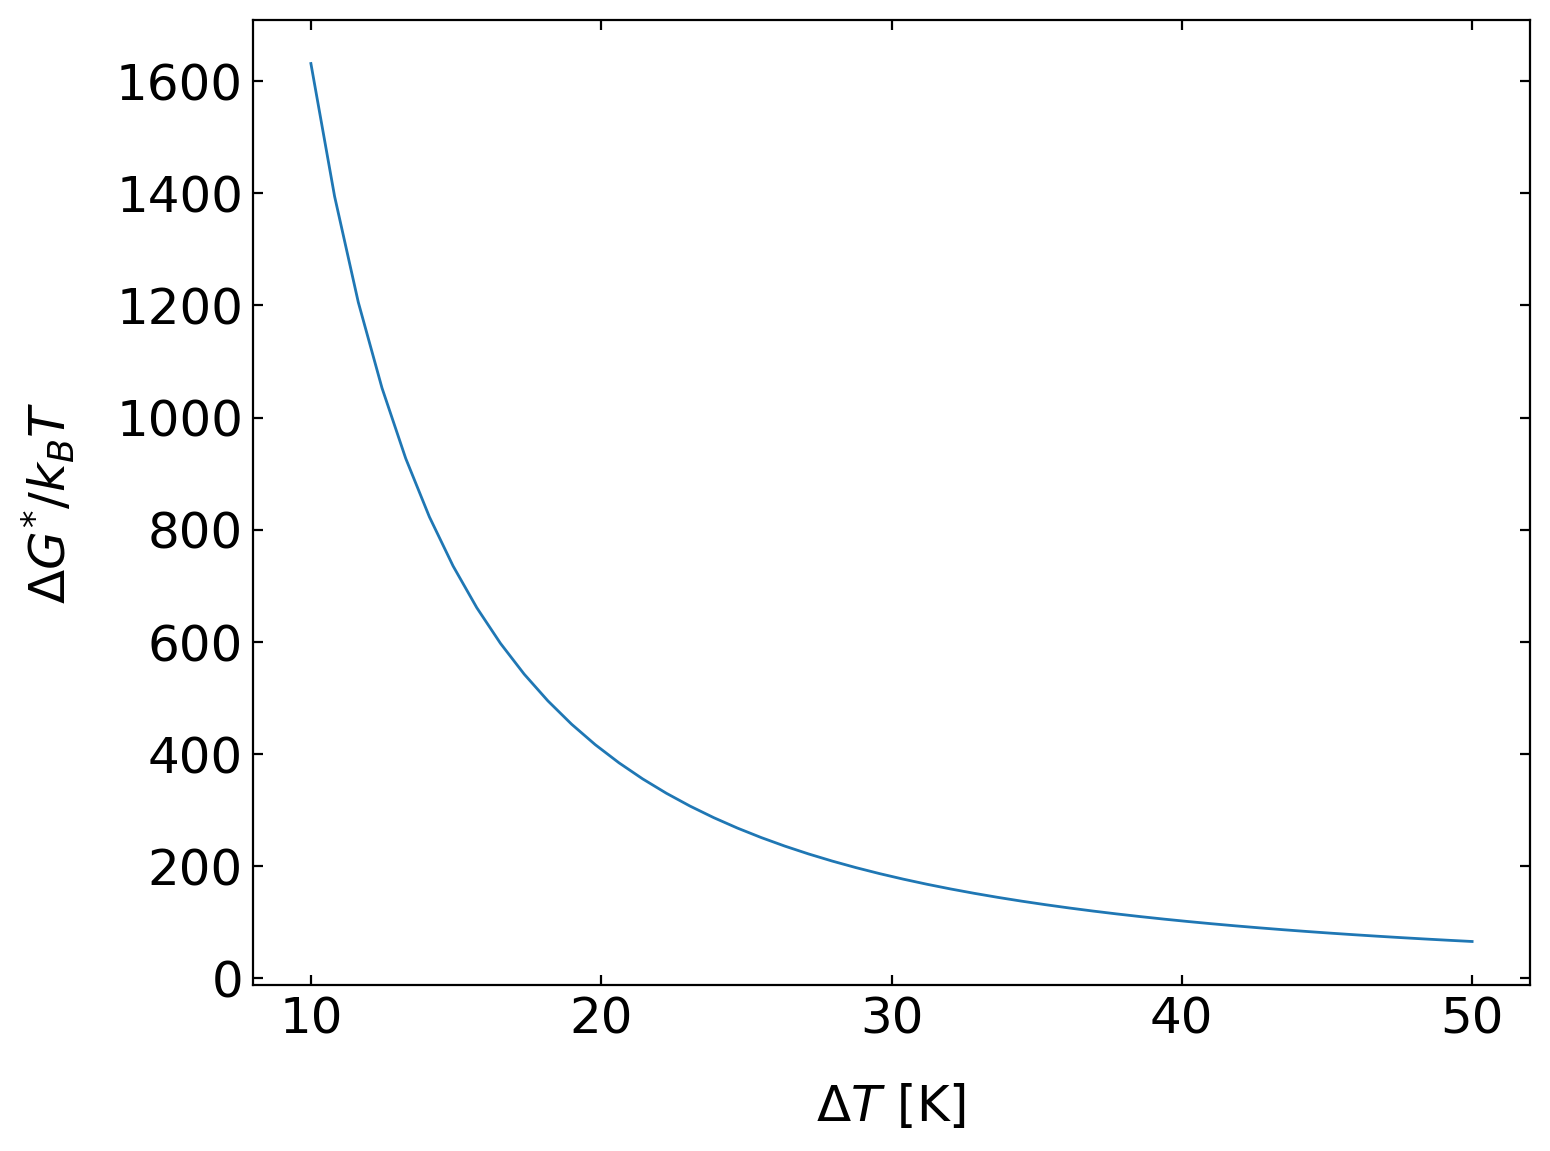

In [5]:
#| fig-align: center
#| fig-width: 2

plt.figure(figsize=(8,6))
dt=np.linspace(10,50)
kbT=3.769e-21
plt.plot(dt,dGstar(dt)/kbT)
plt.xlabel(r'$\Delta T$ [K]')
plt.ylabel(r'$\Delta G^{*}/k_{B}T$')
plt.tight_layout()
plt.savefig("img/dGstar.png")
plt.show()

According to that, homogeneous nucleation, i.e., the freezing of a liquid is very unlikely and actually does not happen. More likely are heterogeneous nucleation events, which occur at the boundaries of the container or at impurities.

### Heterogeneous Nucleation

To study the process of heterogeneous nucleation, we have a look at a container wall, which acts as a nucleation catalyst. At this container wall, a solid droplet in the form of a spherical cap exists.

![image-5.png](img/heterogeneous_nucleation.png)

The solid material shall have a contact angle of $θ$ with the catalyst surface. In this case, the contact angle obeys Young's law $γ_{\mathrm{sl}} \cos(θ) = γ_{\mathrm{cl}} - γ_{\mathrm{cs}}$. Further, for the calculation of the volume and interfacial contributions, we need the volume and the surfaces of the spherical cap as well as the surface at the catalyst interface, which all together read:
 
$$
\begin{aligned}
V &= \frac{1}{3} \pi r^3 (1 - \cos(\theta))^2 (2 + \cos(\theta)),\\
S_{\mathrm{sl}} &= 2 \pi r^2 (1 - \cos(\theta)),\\
S_{\mathrm{cs}} &= \pi r^2 \sin^2(\theta).
\end{aligned}
$$

Following the earlier arguments, we can write down the free energy change upon nucleation of a spherical cap of a radius $r$ at the catalyst surface as:

$$
\begin{aligned}
\Delta G(r) &= \frac{1}{3} \pi r^3 (1 - \cos(\theta))^2 (2 + \cos(\theta))\\
&+ \gamma_{\mathrm{sl}} 2 \pi r^2 (1 - \cos(\theta))\\
&+ \gamma_{\mathrm{cs}} \pi r^2 \sin^2(\theta)\\
&- \gamma_{\mathrm{cl}} \pi r^2 \sin^2(\theta).
\end{aligned}
$$

With the help of Young's equation, we can simplify this to:

$$
\Delta G^{*} = \frac{16 \pi}{3} \gamma_{\mathrm{sl}}^3 \left( \frac{T_{\mathrm{m}}}{\Delta H_{\mathrm{m}}} \right)^2 \frac{1}{\Delta T^2} \left( \frac{(1 - \cos(\theta))^2 (2 + \cos(\theta))}{4} \right).
$$

The latter fraction is actually only an additional geometrical factor that depends only on $θ$, while all factors before just resemble the homogeneous nucleation result. The graph below displays this geometrical factor $f(θ)$ as a function of the contact angle $θ$ and indicates that the creation of a nucleus with a certain contact angle at a solid wall considerably lowers the nucleation barrier. The nucleation barrier can thus be easily as low as thermal energy, as shown in the graph below for the water/ice system. The nucleus size in that model stays the same, while a contact angle of about 14° yields a nucleation barrier of $1\, k_{\mathrm{B}} T$.

In [6]:
def f(theta):
    return((1-np.cos(theta))**2*(2+np.cos(theta))/4)

In [7]:
theta=np.linspace(0,180,100)

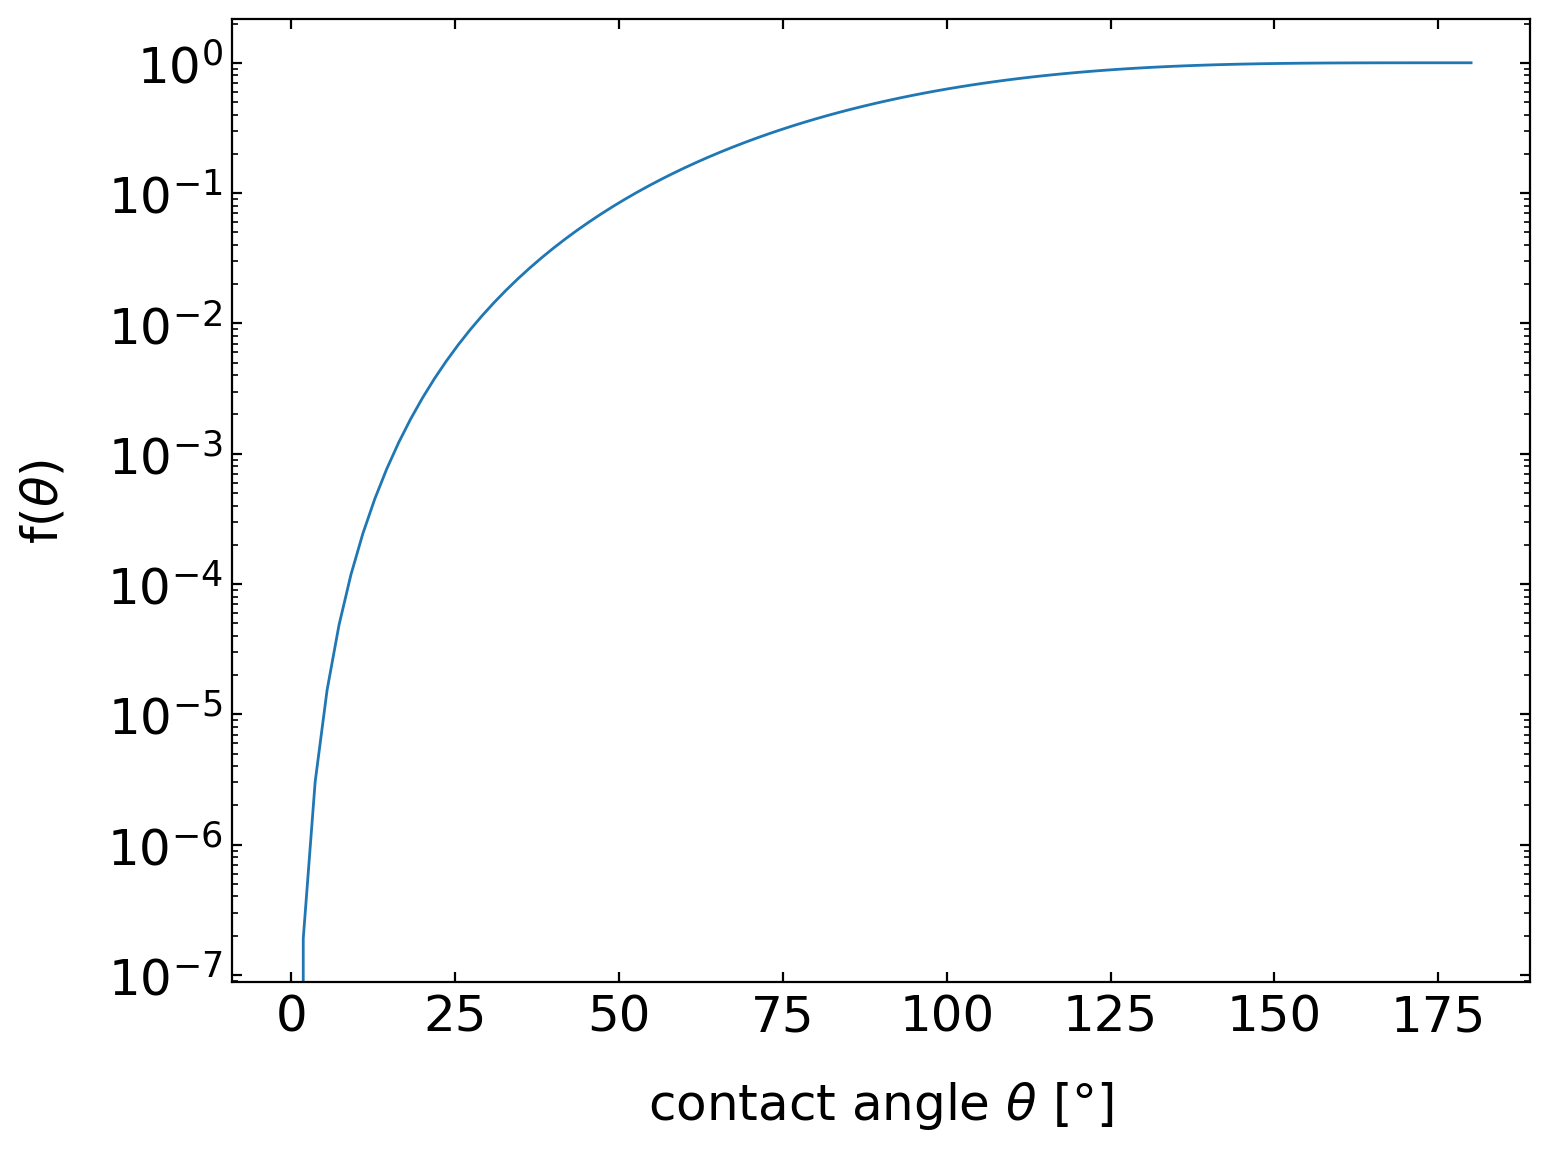

In [8]:
plt.figure(figsize=(8,6))
plt.semilogy(theta,f(theta*np.pi/180))
plt.xlabel(r'contact angle $\theta$ [°]')
plt.ylabel(r'f($\theta$)')
plt.tight_layout()
plt.savefig("img/f(theta).png")
plt.show()

_Geometry factor for the heterogeneous nucleation of a droplet with a contact angle at a catalyst wall_



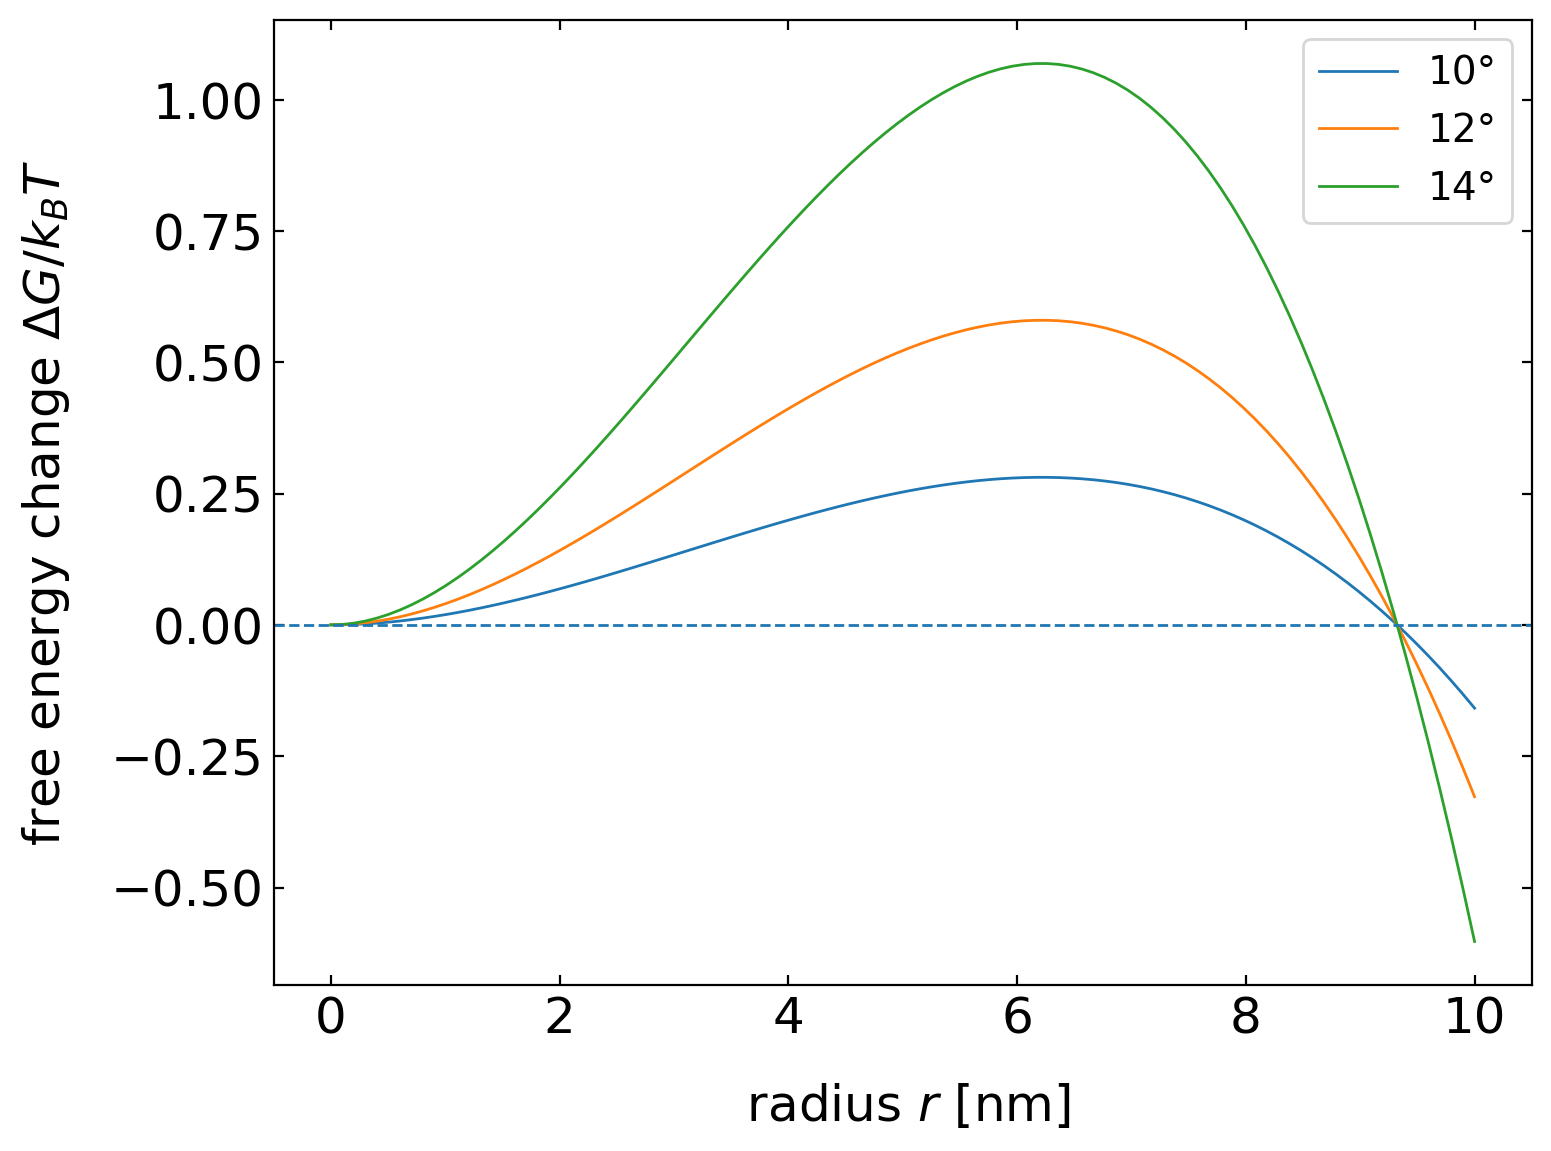

In [9]:
plt.figure(figsize=(8,6))
r=np.linspace(0,1e-8,100)
kbT=3.769e-21

[plt.plot(r*1e9,dG(r,10)*f(theta*np.pi/180)/kbT,'-',label=str(theta)+"°") for theta in range(10,16,2)]
plt.xlabel(' radius $r$ [nm] ')
plt.ylabel('free energy change $\Delta G/k_{B}T$')
plt.axhline(y=0,ls='--')
plt.legend()
plt.tight_layout()
plt.savefig("img/multiple_dG.png")
plt.show()

_Nucleation barrier as a function of nucleus radius for heterogeneous nucleation at a wall. The curves display the results for the water/ice interface._



### Classification of phase transitions

A classification of different phase transitions can be carried out using the scheme of **Ehrenfest**. According to that, a phase transition is categorized based on the order of the derivative of the free energy that shows discontinuity at the transition point.

$$
dG=-SdT+VdP+\mu dN
$$

$$
\left( \frac{\partial G}{\partial T} \right)_{P}=-S \quad \left( \frac{\partial G}{\partial P} \right)_{T}=V
$$

![classification_fig_01](img/classification_of_phase_transition_fig_01.png)

- phase transitions at the phase boundary 
- charge is
    - discontinous - first order phase transition
    - continous - second order phase transition
    


![classification_fig_02](img/classification_of_phase_transition_fig_02.png)

The Ehrenfest equations with $m = 1, \dots, n-1$ are

$$
\left. \frac{\partial^{m} G_{\alpha}}{\partial T^{m}} \right|_{P} = \left. \frac{\partial^{m} G_{\beta}}{\partial T^{m}} \right|_{P} 
\qquad
\left. \frac{\partial^{m} G_{\alpha}}{\partial P^{m}} \right|_{T} = \left. \frac{\partial^{m} G_{\beta}}{\partial P^{m}} \right|_{T}
$$

and

$$
\left. \frac{\partial^{m} G_{\alpha}}{\partial T^{m}} \right|_{P} \neq \left. \frac{\partial^{m} G_{\beta}}{\partial T^{m}} \right|_{P} 
\qquad
\left. \frac{\partial^{n} G_{\alpha}}{\partial P^{n}} \right|_{T} = \left. \frac{\partial^{n} G_{\beta}}{\partial P^{n}} \right|_{T}.
$$

lack at the derivative of $G$ as a fraction of the temperature.

#### First Order Phase Transitions

$$
\left. \frac{\partial G}{\partial T} \right|_{P} = -S, \quad \left. \frac{\partial G}{\partial P} \right|_{T} = V, \quad \left. \frac{\partial G}{\partial N} \right|_{T} = \mu
$$

- $G$ has a kink (discontinuous)
- $\curvearrowright$ $S$, $V$ have a jump
- $\curvearrowright$ $\mu$ has a kink

$$
C_{P} = \left. \frac{dH}{dT} \right|_{P} = T \left( \frac{\partial S}{\partial T} \right)_{P} \rightarrow \infty
$$

- latent heat $\rightarrow$ melting, evaporation

#### Second Order Phase Transitions

- $G(T, P)$ is continuous  
- $S(T, P)$, $V(T, P)$ are continuous  
- specific heat  
$$
C_{P} = T \left. \frac{\partial S}{\partial T} \right|_{P} = -T \left( \frac{\partial^{2} G}{\partial T^{2}} \right)_{P}
$$
is discontinuous  
- isothermal compressibility  
$$
\kappa_{T} = -\frac{1}{V} \left( \frac{\partial V}{\partial P} \right)_{T} = -\frac{1}{V} \left( \frac{\partial^{2} G}{\partial P^{2}} \right)_{T}
$$  
- thermal expansion coefficient  
$$
\alpha = \frac{1}{V} \left( \frac{\partial V}{\partial T} \right) = \frac{1}{V} \left( \frac{\partial^{2} G}{\partial T \partial P} \right)
$$  